In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import pydataset as data
import env

Has the network latency gone up since we switched internet service providers?


- (null hypothesis) No the network latency has not changed
- (a hypothesis) Yes the network latency has changed
- (true positive) Has changed but really didnt
- (true negative) Has not changed but really did change

Is the website redesign any good?

- (null hypothesis) Yes the redsign is good
- (a hypothesis) No the redesign isn't good
- (true positive) Redesign isn't good but really is
- (true negative) Redesign is good but really isn't

Is our television ad driving more sales?

- (null hypothesis) Yes the ad is driving sales
- (a hypothesis) No the ad isn't driving sales
- (true positive) Ad isn't driving sales but really is
- (true negative) Ad is driving but really isn't

### Comparison of Means (Exercises)

1. Answer with the type of test you would use (assume normal distribution):

* Is there a difference in grades of students on the second floor compared to grades of all students?


One Sample T-Test (two tailed)

* Are adults who drink milk taller than adults who dont drink milk?


Independent T-Test (one tailed)

* Is the the price of gas higher in texas or in new mexico?

Independent T-Test (one tailed)

* Are there differences in stress levels between students who take data science 
vs students who take web development vs students who take cloud academy?

ANOVA (two tailed)

2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [169]:
# Is there a difference in the average time to sell a home for office #1 and office #2 
# comparing two different independent groups (Independet T-Test)
# We just want to see if theres a difference no direction (one tailed)
# null hypothesis = office 1 and office 2 do not have different average sell times
# alternate hypothesis = office 1 and office 2 have different average sell times

In [170]:
alpha = 0.05
# 40 sales
office_1_avg = 90 
office_1_std = 15
# 50 sales
office_2_avg = 100
office_2_std = 20


In [181]:
office_one = stats.norm(office_1_avg, office_1_std).rvs(40)
office_two = stats.norm(office_2_avg, office_2_std).rvs(50)

In [184]:
office_one

array([ 73.88615645,  46.89537738, 118.25030998,  90.34239951,
        84.93723493, 109.41931414,  98.47067491,  86.00433602,
        80.15830154,  88.92818791, 106.95674981,  74.20676827,
        95.1884391 , 108.20839295,  75.24416207, 104.19186479,
        72.57889871,  68.01459023,  85.93587564,  77.13451955,
        83.63325242,  92.66433592,  86.88728711,  99.00896364,
       116.1464659 ,  92.71759269,  98.11713659,  93.84458584,
        95.58926261,  84.41467485,  95.79608984,  71.74821789,
       115.06892871,  83.70804383,  65.81292792,  93.06643659,
        86.49466911,  58.92577615,  87.95656308,  55.1351899 ])

In [197]:
office_two

array([ 73.59718475,  91.64072514,  94.91713823, 113.27691296,
       107.05903424,  81.22551231, 111.44421059,  92.21583429,
       113.79563221,  98.13268658, 100.55037746,  83.14464237,
       104.01528315, 112.33356079,  63.94381988, 113.72576298,
        48.47853326,  70.41337339, 121.88062406,  92.04013636,
       102.62049268, 155.89237071,  76.69957176, 109.07090932,
       103.93772377,  87.33805455,  95.02339914, 148.7182225 ,
        99.02047734, 121.63750729,  97.3652554 ,  80.60338977,
       101.4421638 ,  94.99998844,  80.9098922 ,  83.859178  ,
       125.10304241, 106.29295721,  64.82546778,  53.30560901,
        99.32011877, 112.92432869, 133.02891956,  73.27441777,
       121.09161391,  69.45698696,  79.50299259, 102.32518669,
        97.854434  , 102.26865945])

In [201]:
stat, p_val = stats.levene(office_one, office_two)

In [203]:
stat, p_val

(2.136872393553811, 0.1473567181306041)

In [204]:
t, p = stats.ttest_ind(office_one, office_two)
t, p

(-2.3708499791749387, 0.019930189719280452)

In [205]:
if p/2 < alpha:
    print("We can reject null hypothesis")
else:
    print("We fail to reject hypothesis")

We can reject null hypothesis


In [206]:
stats.ttest_ind_from_stats(90,15,40,100,20,50, equal_var=False)

Ttest_indResult(statistic=-2.7091418459143854, pvalue=0.00811206270346016)

3. Load the mpg dataset and use it to answer the following questions:

In [207]:
mpg = data.data("mpg")

In [208]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


* Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [49]:
#  The difference (two tailed) of the two independent means 2008(mpg avg) 1999(mpg avg) (Independent T-Test)
# Null hypothesis = There is no difference between the 2008 fuel efficiency and 1999 fuel efficiency
# Alternate hypothesis = There is a difference between the 2008 fuel efficiency and 1999 fuel efficiency

In [210]:
mpg["fuel_avg"] = (mpg["cty"] + mpg["hwy"])/2

# Different types of means (harmonic mean)

In [212]:
mpg["avg_fe"] = stats.hmean(mpg[["cty", "hwy"]], axis=1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe,fuel_avg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524,21.0


In [213]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe,fuel_avg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,22.638298,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,24.360000,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,19.809524,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,21.272727,22.0


In [214]:
mpg_08 = mpg[mpg.year == 2008].fuel_avg

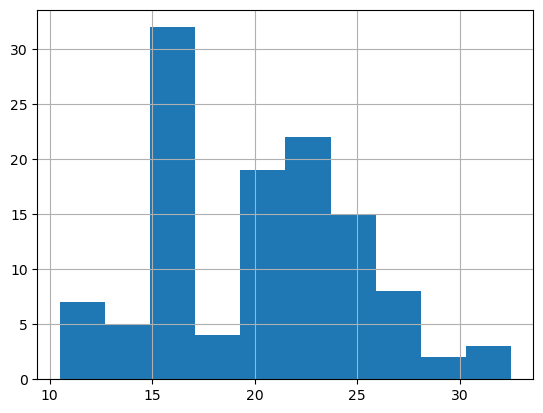

In [66]:
mpg_08.hist()
plot.show()


In [218]:
mpg_99 = mpg[mpg.year == 1999].fuel_avg

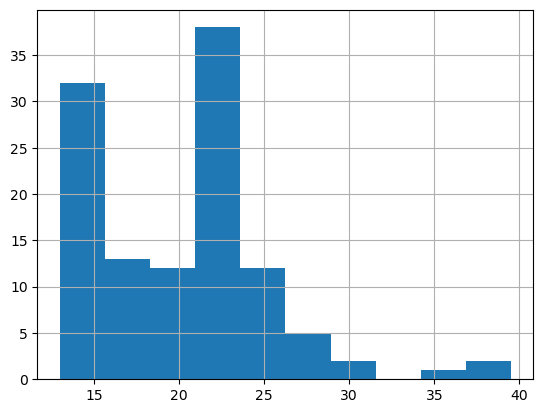

In [219]:
mpg_99.hist()
plot.show()

In [217]:
stats.levene(mpg_08, mpg_99)

LeveneResult(statistic=0.033228136671080453, pvalue=0.855517569468803)

In [221]:
t, p = stats.ttest_ind(mpg_08, mpg_99)

In [223]:
if p/2 < alpha:
    print("We can reject null hypothesis")
else:
    print("We fail to reject null hypothesis")

We fail to reject null hypothesis


* Are compact cars more fuel-efficient than the average car?

In [224]:
# do compact cars have greater (one tailed) fuel efficiency than the average car (One sample)
# Null hypothesis = There is no difference in fuel efficiency for compact cars and the average car
# alternate hypothesis = There is a difference in fuel efficiency for compact cars and the average car
#  t > 0 & p/2 < alpha 

In [225]:
compact = mpg[mpg["class"] == "compact"].fuel_avg

<AxesSubplot:>

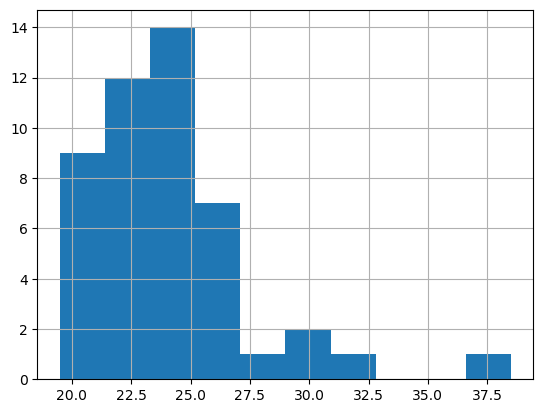

In [243]:
compact.hist()

In [245]:
vehicles = mpg["fuel_avg"]
vehicles_avg = vehicles.mean()

<AxesSubplot:>

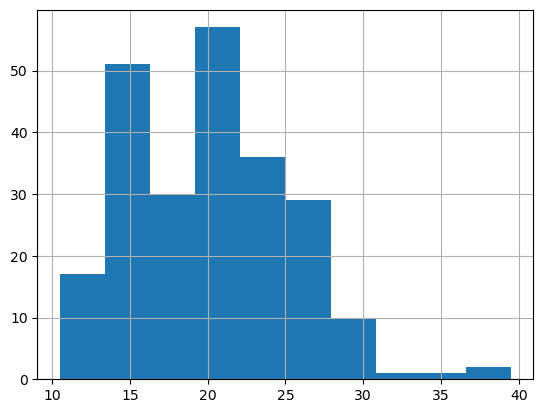

In [247]:
vehicles.hist()

In [239]:
t, p = stats.ttest_1samp(compact, vehicles_avg)

In [248]:
if (p/2 < alpha) and (t >  0):
    print("We reject Null Hypothesis")
else:
    print("We fail to reject Null Hypothesis")
    
    

We reject Null Hypothesis


* Do manual cars get better gas mileage than automatic cars?

* Do manual cars have greater (one tailed) fuel average than automatic cars 
* two independent means (Independent T-Test)
* $H_{o}$ = maunaul cars do not have a greater fuel average than automatic cars 
* $H_{a}$ = maunaul cars do have a greater fuel average than automatic cars 

In [ ]:
mpg.trans.unique()

In [141]:
manual_types = ["manual(m5)", "manual(m6)"]
manual = mpg.loc[mpg["trans"].isin(manual_types)].fuel_avg

In [142]:
automatic = mpg.loc[~mpg["trans"].isin(manual_types)].fuel_avg

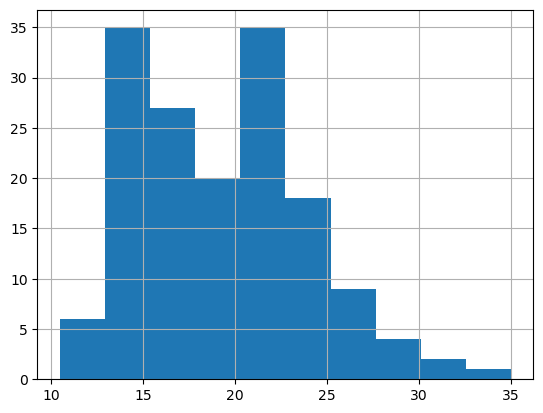

In [145]:
automatic.hist()
plot.show()

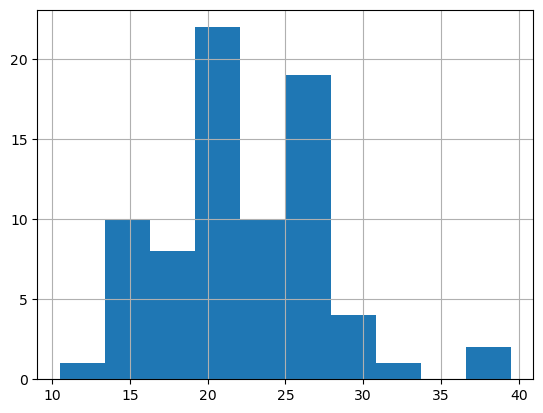

In [146]:
manual.hist()
plot.show()

In [149]:
#equal variances
stats.levene(manual, automatic)

LeveneResult(statistic=0.20075824847529639, pvalue=0.6545276355131857)

In [257]:
t, p = stats.ttest_ind(manual, automatic)

In [258]:
t, p

(4.593437735750014, 7.154374401145683e-06)

In [259]:
if p/2 < alpha:
    print("We reject Null Hypothesis")
elif t >  0:
    print("We reject Null Hypothesis")
else:
    print("We fail to reject Null Hypothesis")

We reject Null Hypothesis


In [249]:
#Write with LaTex

$H_{o}$
$H_{a}$

$\chi^2 = \sum{\frac{(O - E)^2}{E}} $

$\chi^2$

1. Answer with the type of stats test you would use (assume normal distribution):

* Is there a relationship between the length of your arm and the length of your foot?
Pearson's
var.1 = len(arm)
var.2 = len(leg)

* Do guys and gals quit their jobs at the same rate?
Independent T-Test
var.1 = gender (cat)
var.2 = quitting rate (cont.)

* Does the length of time of the lecture correlate with a students grade?
Pearson's 
var.1 = lecture length (cont)
var.2 = student grade if numerical (cont) or discrete if letter grade

2. Use the telco_churn data.

* Does tenure correlate with monthly charges?

* $H_O$ = Theres is no linear relationship between tenure and monthly charges
* $H_A$ = Theres is a linear relationship between tenure and monthly charges

In [275]:
df = pd.read_csv("telco_norm.csv")

In [287]:
df

,customer_id,signup_date,churn_month,monthly_charges,total_charges,payment_type_id,payment_type,contract_type_id,contract_type,gender,...,phone_service,multiple_lines,internet_service_type_id,internet_service_type,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,0002-ORFBO,2021-04-21 18:07:34,NaN,65.60,593.3,2,Mailed check,2,One year,Female,...,Yes,No,1,DSL,No,Yes,No,Yes,Yes,No
1,0003-MKNFE,2021-04-21 18:07:34,NaN,59.90,542.4,2,Mailed check,1,Month-to-month,Male,...,Yes,Yes,1,DSL,No,No,No,No,No,Yes
2,0004-TLHLJ,2021-09-21 18:07:34,2022-01-31,73.90,280.85,1,Electronic check,1,Month-to-month,Male,...,Yes,No,2,Fiber optic,No,No,Yes,No,No,No
3,0011-IGKFF,2020-12-21 18:07:34,2022-01-31,98.00,1237.85,1,Electronic check,1,Month-to-month,Male,...,Yes,No,2,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,0013-EXCHZ,2021-10-21 18:07:34,2022-01-31,83.90,267.4,2,Mailed check,1,Month-to-month,Female,...,Yes,No,2,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9979-RGMZT,2021-06-21 18:07:34,NaN,94.05,633.45,2,Mailed check,2,One year,Female,...,Yes,No,2,Fiber optic,No,Yes,No,No,Yes,Yes
7039,9985-MWVIX,2021-12-21 18:07:34,2022-01-31,70.15,70.15,2,Mailed check,1,Month-to-month,Female,...,Yes,No,2,Fiber optic,No,No,No,No,No,No
7040,9986-BONCE,2021-09-21 18:07:34,2022-01-31,20.95,85.5,3,Bank transfer (automatic),1,Month-to-month,Female,...,Yes,No,3,None,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
7041,9992-UJOEL,2021-11-21 18:07:34,NaN,50.30,92.75,2,Mailed check,1,Month-to-month,Male,...,Yes,No,1,DSL,No,Yes,No,No,No,No


In [312]:
df["total_charge"] = pd.to_numeric(df["total_charges"], errors= "coerce")


In [552]:
df["monthly_tenure"] = df.total_charge / df.monthly_charges
df = df.replace(-np.inf, np.nan)
df = df.dropna()

In [338]:
x = df.monthly_tenure
y = df.monthly_charges
r, p = stats.pearsonr(x, y)
alpha = 0.05

In [339]:
r, p

(0.40233023286923153, 1.180039734076005e-73)

In [340]:
if p < alpha:
    print("Reject null hypothesis")
else:
    print("Failed to reject null hypothesis")

Reject null hypothesis


<AxesSubplot:xlabel='monthly_tenure', ylabel='monthly_charges'>

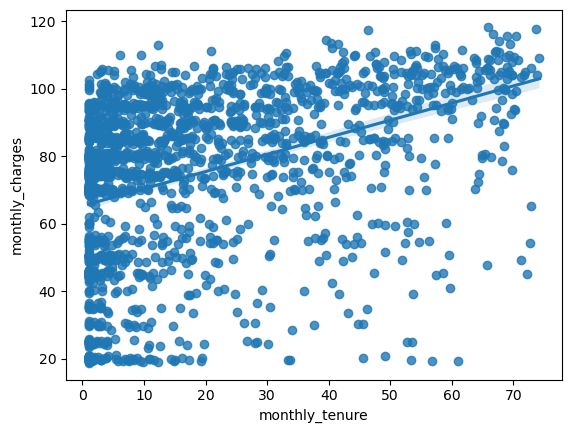

In [553]:
sns.regplot(x="monthly_tenure", y="monthly_charges", data = df)

* Total charges?
* $H_O$ = Theres is no linear relationship between tenure and total charges 
* $H_A$ = Theres is a linear relationship between tenure and total charges 

In [554]:
x = df.monthly_tenure
y = df.total_charge
r, p = stats.pearsonr(x, y)
alpha = 0.05
ttl_charges = df[["total_charge", "monthly_tenure"]]

In [343]:
if p < alpha:
    print("Reject null hypothesis")
else:
    print("Failed to reject null hypothesis")

Reject null hypothesis


* What happens if you control for phone and internet service?

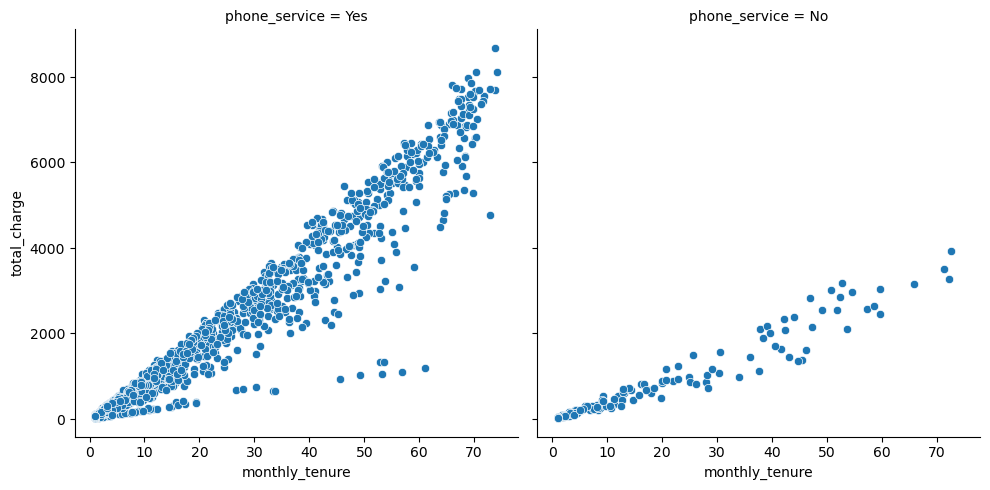

In [353]:
sns.relplot(data=df, x=x,y=y, col="phone_service" )

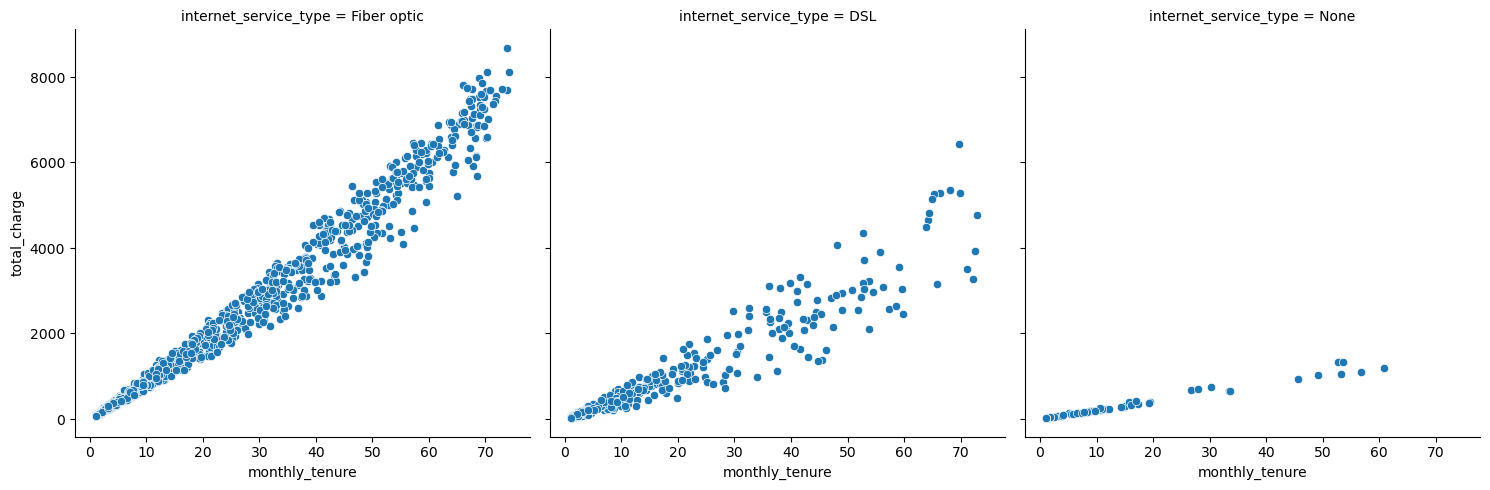

In [355]:
sns.relplot(data=df, x=x,y=y, col="internet_service_type" )

3. Use the employees database.

* Is there a relationship between how long an employee has been with the company and their salary?
* $H_o$: There is no relationship between employee tenure and employee salary 
* $H_a$: There is a relationship employee tenure and employee salary 

In [484]:
emp = pd.read_sql("select e.emp_no as emp_id, datediff(s.from_date, e.hire_date) as days, s.salary as salary from employees as e join salaries as s using(emp_no) where to_date > curdate()", env.get_db_url("employees"))

In [485]:
emp

,emp_id,days,salary
0,10001,5840,88958
1,10002,5733,72527
2,10003,5574,43311
3,10004,5475,74057
4,10005,4380,94692
...,...,...,...
240119,499995,3427,52868
240120,499996,4245,69501
240121,499997,5606,83441
240122,499998,2995,55003


In [486]:
emp["days"] = emp["days"].astype(float)
emp["years"] = emp["days"] /365 
years = emp.years
salary = emp.salary

In [487]:
r1 , p1 = stats.pearsonr(years,salary)
emp.years

0         16.000000
1         15.706849
2         15.271233
3         15.000000
4         12.000000
            ...    
240119     9.389041
240120    11.630137
240121    15.358904
240122     8.205479
240123     4.000000
Name: years, Length: 240124, dtype: float64

In [488]:
r1, p1

(0.30902405704481667, 0.0)

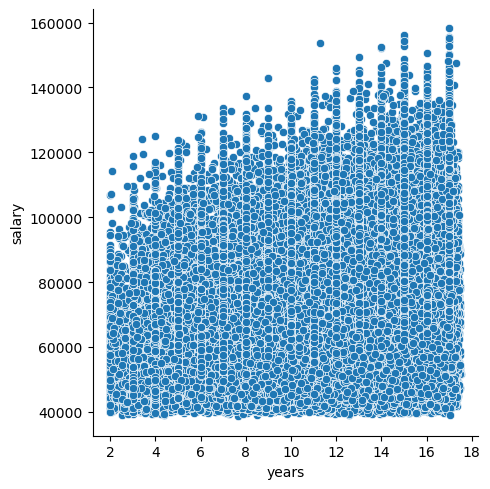

In [489]:
sns.relplot(data=emp, x=years, y=salary)

* Is there a relationship between how long an employee has been with the company and the number of titles they have had?
* $H_o$: There is no relationship between how long an employee has been with the company and the number of titles 
* $H_a$: There is a relationship between how long an employee has been with the company and the number of titles

In [499]:
emp1 = pd.read_sql("select e.emp_no as emp_id, count(t.title) as num_of_titles from employees as e join titles as t using(emp_no) group by e.emp_no", env.get_db_url("employees"))

In [502]:
emp_table = pd.merge(emp, emp1)

In [506]:
emp_table

,emp_id,days,salary,years,test,num_of_titles
0,10001,5840.0,88958,16.000000,89323.0,1
1,10002,5733.0,72527,15.706849,72892.0,1
2,10003,5574.0,43311,15.271233,43676.0,1
3,10004,5475.0,74057,15.000000,74422.0,2
4,10005,4380.0,94692,12.000000,95057.0,2
...,...,...,...,...,...,...
240119,499995,3427.0,52868,9.389041,53233.0,1
240120,499996,4245.0,69501,11.630137,69866.0,2
240121,499997,5606.0,83441,15.358904,83806.0,2
240122,499998,2995.0,55003,8.205479,55368.0,2


In [508]:
emp_table = emp_table.drop(["test"], axis=1)

In [510]:
x3 = emp_table.years 
y3 = emp_table.num_of_titles

In [512]:
stats.pearsonr(x3, y3)

PearsonRResult(statistic=0.2890655004737338, pvalue=0.0)

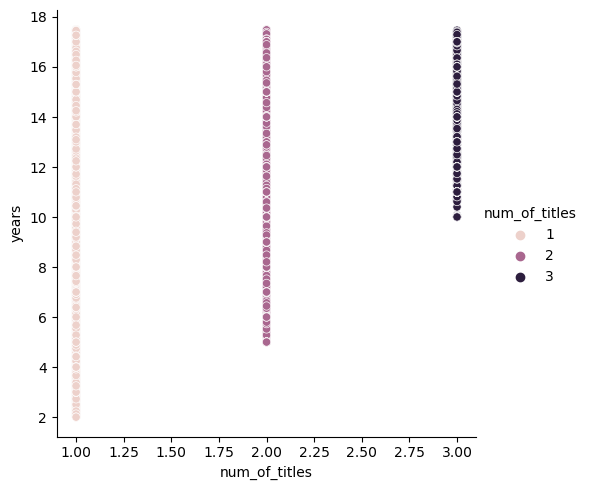

In [551]:
sns.relplot(data=emp_table, y= emp_table.years , x=emp_table.num_of_titles, hue=emp_table.num_of_titles)

4. Use the sleepstudy data.

In [523]:
sleep = data.data("sleepstudy")

In [524]:
sleep

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


* Is there a relationship between days and reaction time?
* $H_o$: There is no relationship between days and reaction time
* $H_a$: There is a relationship between days and reaction time

In [527]:
stats.pearsonr(sleep.Days, sleep.Reaction)

PearsonRResult(statistic=0.5352302262650253, pvalue=9.894096322214812e-15)

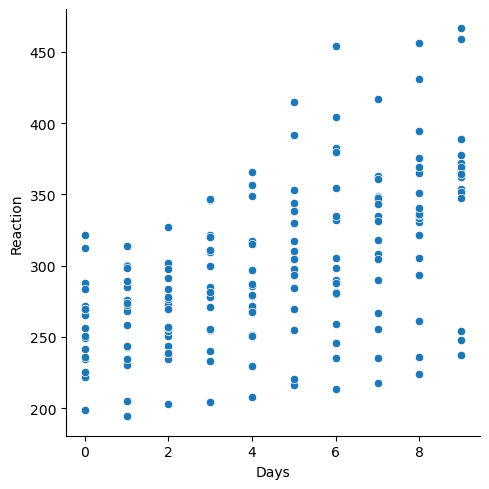

In [547]:
sns.relplot(x="Days", y="Reaction", data=sleep)

1. Answer with the type of stats test you would use (assume normal distribution):

* Do students get better test grades if they have a rubber duck on their desk?

test grades (cont) and rubbr duck (cat)
2 sample - 1 tailed

* Does smoking affect when or not someone has lung cancer?

smoke(cat) & cancer(cat) 
Chi
* Is gender independent of a person’s blood type?

gender (cat) blood (cat) 
Chi
* A farming company wants to know if a new fertilizer has improved crop yield or not
T-Test 

* Does the length of time of the lecture correlate with a students grade?

length of time (cont) & students grad (cat or cont- assume cont.)
pearson's
* Do people with dogs live in apartments more than people with cats?

dog people (1st sample group- discrete) & cat people (2nd sample group- discrete)
Independent T-Test - 1 Tailed

2. Use the following contingency table to help answer the question of whether using a macbook 
and being a codeup student are independent of each other.

$H_o$: There is no relationship between using a macbook and being a codeup student

$H_a$: There is a relationship between using a macbook and being a codeup student

In [77]:
data1 = {"student": [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1] , "mac": [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0]}

In [78]:
df = pd.DataFrame(data1 )

In [79]:
observed = pd.crosstab(df.student, df.mac)

In [80]:
dist = stats.randint(0, 1)

In [82]:
# run chi-square test
chi2, p, degf, expected = stats.chi2_contingency(observed)
alpha = 0.05

In [83]:
chi2, p

(36.65264142122487, 1.4116760526193828e-09)

In [84]:
if p < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail To Reject Null Hypothesis")

Reject Null Hypothesis


3. Choose another 2 categorical variables from the mpg dataset and perform a chi2
 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [2]:
mpg2 = data.data("mpg")

In [58]:
observed2 = pd.crosstab(mpg2["year"], mpg2['cyl'])

In [59]:
observed2

cyl,4,5,6,8
year,,,,
1999,45,0,45,27
2008,36,4,34,43


In [62]:
chi2, p, degf, expected = stats.chi2_contingency(observed2)
alpha = 0.05
chi2, p

(10.18878842676311, 0.01702768537665195)

In [61]:
if p < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail To Reject Null Hypothesis")

Reject Null Hypothesis


4. Use the data from the employees database to answer these questions:

* Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

gender (cat) & sales or marketing (cat)

$H_o$: There is no relationship between gender and emp working in (sales | marketing)

$H_a$: There is a relationship between gender and emp working in (sales | marketing) 


In [82]:
emp = pd.read_sql("select e.emp_no as emp, e.gender, de.* from employees as e join dept_emp as de on de.emp_no = e.emp_no where de.dept_no = 'd007' or de.dept_no = 'd001' and (de.to_date > curdate())", env.get_db_url("employees"))

In [83]:
observed3 = pd.crosstab(emp.gender, emp.dept_no)

In [84]:
observed3

dept_no,d001,d007
gender,,
F,5864,20854
M,8978,31391


In [66]:
chi2, p, degf, expected = stats.chi2_contingency(observed3)
alpha = 0.05

In [67]:
if p < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail To Reject Null Hypothesis")

Fail To Reject Null Hypothesis


* Is an employee's gender independent of whether or not they are or have been a manager?

In [2]:
emp_man = pd.read_sql("select emp_no, gender, dept_no from employees left join dept_manager using(emp_no)", env.get_db_url("employees"))

In [4]:
emp_man.dept_no = emp_man.dept_no.filna("not manager")

AttributeError: 'Series' object has no attribute 'filna'

In [100]:
emp_man.dept_no = np.where(emp_man != "not manager", "manager", "not manager")

In [102]:
emp_man.dept_no.value_counts()

manager    300024
Name: dept_no, dtype: int64